In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds


In [ ]:
# Load the training and validation datasets
train_data, validation_data = tfds.load(
    'imdb_reviews',
    split=['train[:80%]', 'train[20%:]'],  # 80% for training, 20% for validation
    as_supervised=True  # Return (text, label) pairs
)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.PI6K8D_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.PI6K8D_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.PI6K8D_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
# Define a TextVectorization layer to process the text data
vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=10000,  # Maximum number of words in the vocabulary
    output_mode='int',  # Convert to integers
    output_sequence_length=250  # Pad or truncate to 250 tokens
)

# Adapt the layer to the training data
train_texts = train_data.map(lambda text, label: text)
vectorize_layer.adapt(train_texts)

# Function to vectorize the data
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text), label

# Vectorize the training and validation data
train_data = train_data.map(vectorize_text)
validation_data = validation_data.map(vectorize_text)


In [ ]:
# Batch and prefetch the datasets
train_data = train_data.shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
validation_data = validation_data.batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub


In [ ]:
# Load the pre-trained model from TensorFlow Hub
hub_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
pretrained_model = hub.KerasLayer(hub_url, input_shape=[], dtype=tf.string, trainable=False)


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# Load the pre-trained model from TensorFlow Hub
hub_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
pretrained_model = hub.KerasLayer(hub_url, trainable=False)

# Define a custom layer to wrap the Hub layer call
class EmbeddingLayer(tf.keras.layers.Layer):
    def __init__(self, pretrained_model):
        super(EmbeddingLayer, self).__init__()
        self.pretrained_model = pretrained_model

    def call(self, inputs):
        return self.pretrained_model(inputs)

# Input layer
inputs = tf.keras.Input(shape=[], dtype=tf.string)

# Use the custom embedding layer
embedding = EmbeddingLayer(pretrained_model)(inputs)

# Add a dense layer
x = tf.keras.layers.Dense(64, activation='relu')(embedding)

# Add a dropout layer
x = tf.keras.layers.Dropout(0.5)(x)

# Output layer
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None)                      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_layer (EmbeddingLayer)     │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,897 (128.50 KB)

 Trainable params: 32,897 (128.50 KB)

 Non-trainable params: 0 (0.00 B)

Shape after Lambda layer: (None, 512)
Shape after Dense layer: (None, 64)
Output shape: (1, 1)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None)                      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_1 (Lambda)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,897 (128.50 KB)

 Trainable params: 32,897 (128.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 104ms/step - accuracy: 0.7796 - loss: 0.4965 - val_accuracy: 0.8595 - val_loss: 0.3303
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 100ms/step - accuracy: 0.8534 - loss: 0.3370 - val_accuracy: 0.8611 - val_loss: 0.3219
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 105ms/step - accuracy: 0.8584 - loss: 0.3287 - val_accuracy: 0.8628 - val_loss: 0.3144
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 102ms/step - accuracy: 0.8649 - loss: 0.3195 - val_accuracy: 0.8658 - val_loss: 0.3101
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 95s 124ms/step - accuracy: 0.8664 - loss: 0.3214 - val_accuracy: 0.8674 - val_loss: 0.3056
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 99ms/step - accuracy: 0.8683 - loss: 0.3158 - val_accuracy: 0.8690 - val_loss: 0.3031
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 104ms/step - accuracy: 0.8687 - loss: 0.3153 - val_accuracy: 0.8703 - val_loss: 0.3014
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 100ms/step - accuracy: 0.8755 - loss: 0.

Validation Accuracy: 0.88
Model saved as H5 file: saved_models/sentiment_model.h5
Model saved in Keras format: saved_models/sentiment_model_keras.keras


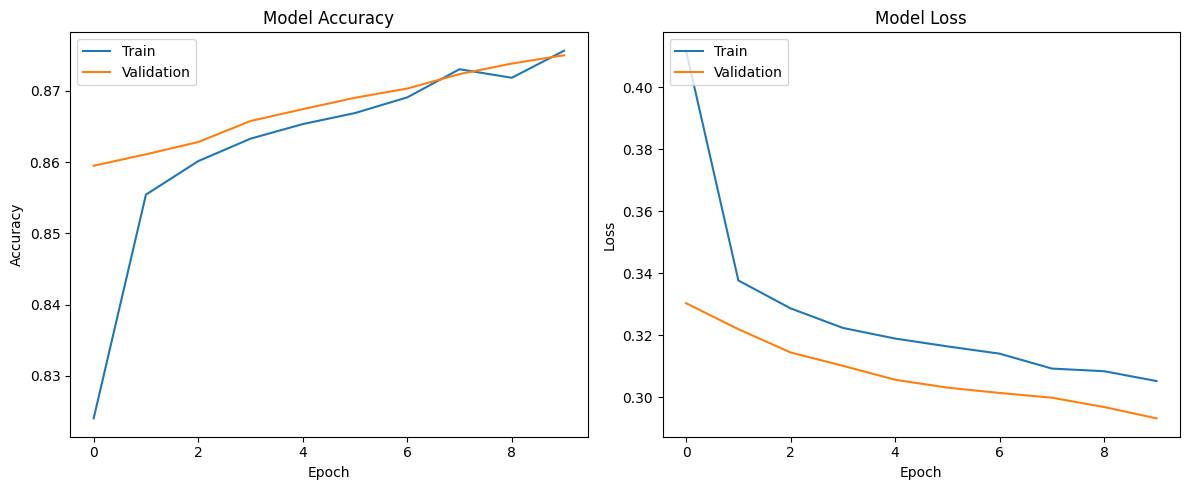

Training graphs saved as 'training_graphs.png'


In [4]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

# Load the IMDB dataset
train_data, validation_data = tfds.load(
    'imdb_reviews',
    split=['train[:80%]', 'train[35%:]'],  # 80% for training, 20% for validation
    as_supervised=True  # Return (text, label) pairs
)

# Batch and prefetch the datasets
train_data = train_data.shuffle(10000).batch(32).prefetch(tf.data.AUTOTUNE)
validation_data = validation_data.batch(32).prefetch(tf.data.AUTOTUNE)

# Load the pre-trained model from TensorFlow Hub
hub_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
pretrained_model = hub.load(hub_url)

import tensorflow as tf

# Define a custom layer that applies the pre-trained model
class EmbeddingLayer(tf.keras.layers.Layer):
    def __init__(self, pretrained_model):
        super(EmbeddingLayer, self).__init__()
        self.pretrained_model = pretrained_model

    def call(self, inputs):
        return self.pretrained_model(inputs)

# Function to compute output shape
def compute_output_shape(input_shape):
    # Dynamically determine output shape based on pretrained model
    test_input = tf.convert_to_tensor(["sample text"], dtype=tf.string)

# ... (rest of your code remains the same)

# Function to compute output shape
def compute_output_shape(input_shape):
    # Dynamically determine output shape based on pretrained model
    test_input = tf.convert_to_tensor(["sample text"], dtype=tf.string)
    output_shape = pretrained_model(test_input).shape
    return (input_shape[0], output_shape[-1])  # Return (batch_size, embedding_dim)



# Input layer
inputs = tf.keras.Input(shape=(), dtype=tf.string)

# Use the custom embedding layer with explicit output shape
embedding = tf.keras.layers.Lambda(lambda x: pretrained_model(x),
                                   output_shape=compute_output_shape)(inputs)

# Debugging: Print the shape after the Lambda layer
print(f"Shape after Lambda layer: {embedding.shape}")

# Add a dense layer
x = tf.keras.layers.Dense(64, activation='relu')(embedding)

# Debugging: Print the shape after the Dense layer
print(f"Shape after Dense layer: {x.shape}")

# Add a dropout layer
x = tf.keras.layers.Dropout(0.5)(x)

# Output layer
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Run a forward pass with dummy data to further debug
dummy_data = tf.convert_to_tensor(["sample input string"], dtype=tf.string)
output = model(dummy_data)
print(f"Output shape: {output.shape}")


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=10  # You can adjust the number of epochs based on performance
)

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(validation_data)
print(f"Validation Accuracy: {accuracy:.2f}")

# Visualize training graph and details
import matplotlib.pyplot as plt
import os

# Create a directory to save the models if it doesn't exist
os.makedirs('saved_models', exist_ok=True)

# Save the model as an H5 file
h5_path = os.path.join('saved_models', 'sentiment_model.h5')
model.save(h5_path)
print(f"Model saved as H5 file: {h5_path}")


# Save the model in Keras format
keras_path = os.path.join('saved_models', 'sentiment_model_keras.keras') # Added .keras extension
model.save(keras_path)
print(f"Model saved in Keras format: {keras_path}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.savefig('training_graphs.png')
plt.show()

print("Training graphs saved as 'training_graphs.png'")

